In [43]:
!gdown --id 1uWdQ2kn25RSQITtBHa9_zayplm27IXNC

Downloading...
From: https://drive.google.com/uc?id=1uWdQ2kn25RSQITtBHa9_zayplm27IXNC
To: C:\Users\Owner\Downloads\clothes\clothing.json

  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 457kB/s]
100%|##########| 199k/199k [00:00<00:00, 457kB/s]


In [44]:
!pip install kaggle

In [45]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
from sklearn.model_selection import train_test_split
from IPython.display import display

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10
np.random.seed(42)

In [46]:
clothing = []
with open("clothing.json") as f:
    for line in f:
        clothing.append(json.loads(line))

In [47]:
len(clothing)

504

In [48]:
for c in clothing:
    if len(c['annotation']) > 1:
        display(c)

{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/b3be330c-c211-45bb-b244-11aef08021c8___Data_free-sk-5108-mudrika-original-imaf4fz626pegq9f.jpeg',
 'annotation': [{'label': ['Jackets'],
   'notes': '',
   'points': [{'x': 0, 'y': 0.6185897435897436},
    {'x': 0.026415094339622643, 'y': 0.6185897435897436}],
   'imageWidth': 265,
   'imageHeight': 312},
  {'label': ['Skirts'],
   'notes': '',
   'points': [{'x': 0.01509433962264151, 'y': 0.03205128205128205},
    {'x': 1, 'y': 0.9839743589743589}],
   'imageWidth': 265,
   'imageHeight': 312}],
 'extras': None}

In [49]:
categories = []
for c in clothing:
    for a in c['annotation']:
        categories.extend(a['label'])
categories = list(set(categories))
categories.sort()
categories

['Jackets',
 'Jeans',
 'Shirts',
 'Shoes',
 'Skirts',
 'Tops',
 'Trousers',
 'Tshirts',
 'sunglasses']

In [50]:
train_clothing, val_clothing = train_test_split(clothing, test_size=0.1)
len(train_clothing), len(val_clothing)

(453, 51)

In [51]:
row = train_clothing[10]
img = urllib.request.urlopen(row["content"])
img = Image.open(img)
img = img.convert('RGB')
img.save("demo_image.jpeg", "JPEG")

HTTPError: HTTP Error 403: Forbidden

In [ ]:
row

In [38]:
img = cv2.cvtColor(cv2.imread('demoImage.jfif'), cv2.COLOR_BGR2RGB)
img.shape

(193, 262, 3)

In [41]:
for a in row['annotation']:
      for label in a['label']:
        w = a['imageWidth']
        h = a['imageHeight']
        points = a['points']
        p1, p2 = points
        x1, y1 = p1['x'] * w, p1['y'] * h
        x2, y2 = p2['x'] * w, p2['y'] * h
        cv2.rectangle(
          img,
          (int(x1), int(y1)),
          (int(x2), int(y2)),
          color=(0, 255, 0),
          thickness=2
        )
        ((label_width, label_height), _) = cv2.getTextSize(
            label,
            fontFace=cv2.FONT_HERSHEY_PLAIN,
            fontScale=1.75,
            thickness=2
        )
        cv2.rectangle(
          img,
          (int(x1), int(y1)),
          (int(x1 + label_width + label_width * 0.05), int(y1 + label_height + label_height * 0.25)),
          color=(0, 255, 0),
          thickness=cv2.FILLED
        )
        cv2.putText(
          img,
          label,
          org=(int(x1), int(y1 + label_height + label_height * 0.25)), # bottom left
          fontFace=cv2.FONT_HERSHEY_PLAIN,
          fontScale=1.75,
          color=(255, 255, 255),
          thickness=2
        )

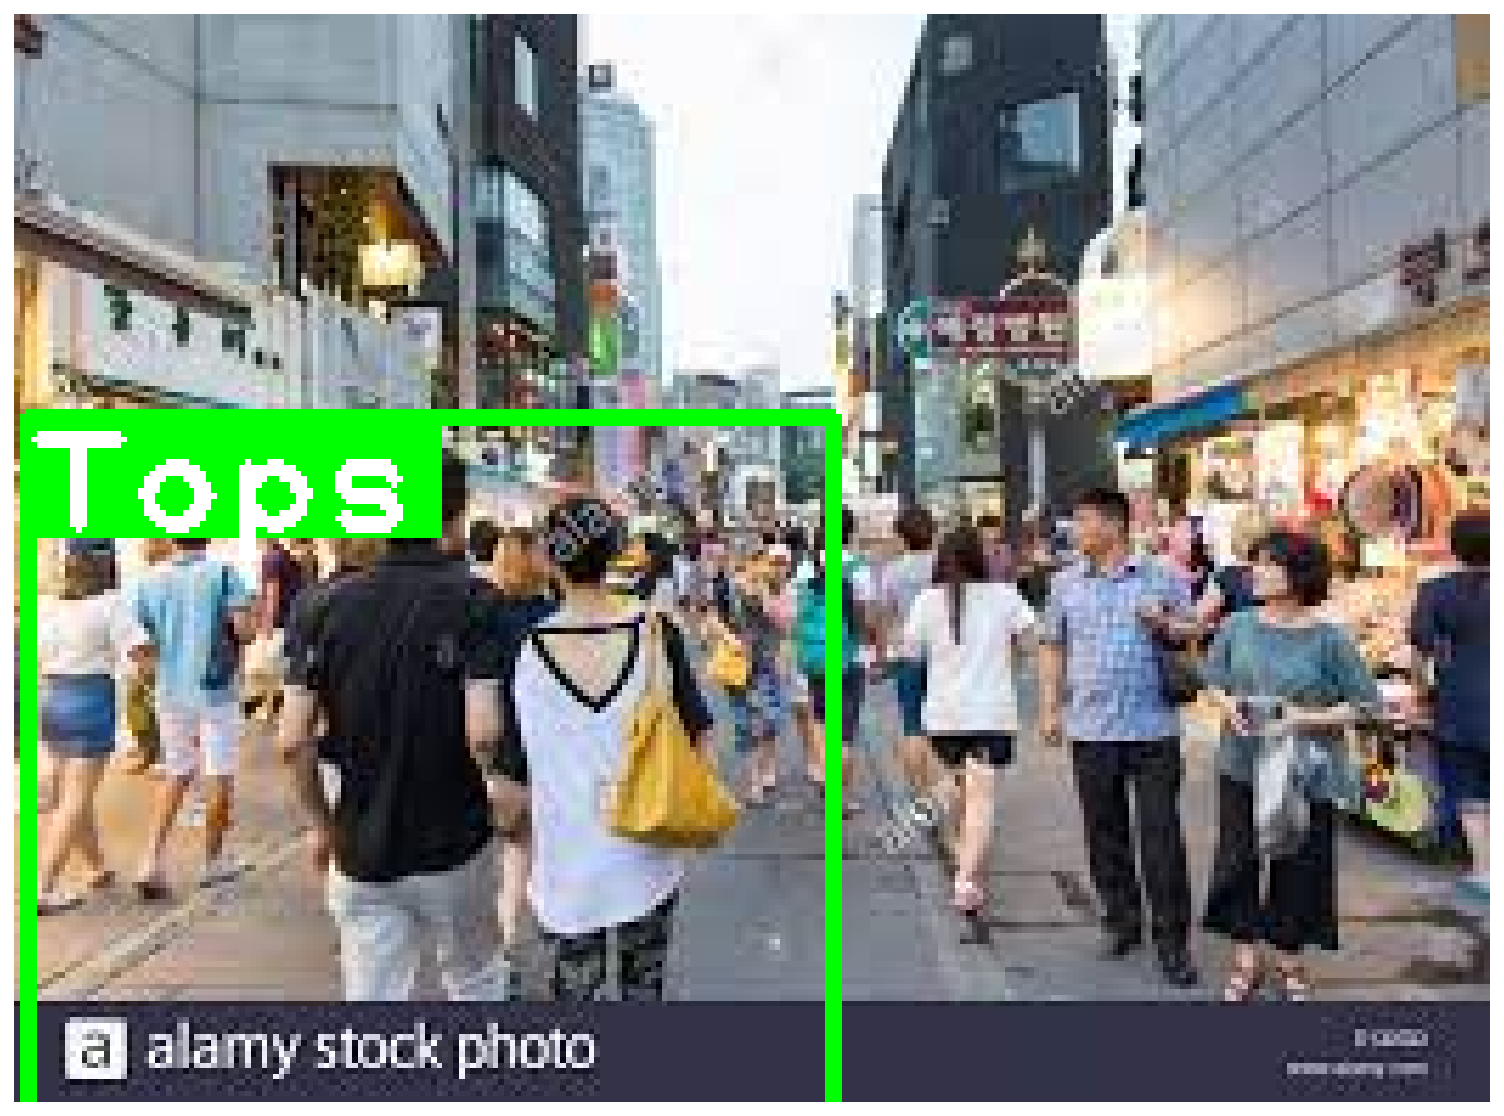

In [42]:
plt.imshow(img)
plt.axis('off');